In [1]:
import win32com.client
import pandas as pd
import numpy as np

wd = "C:/Users/nlilbm/Documents/Thesis/20201221 Mobilitievisie Groningen - complete"

In [2]:
Visum = win32com.client.Dispatch("Visum.Visum")
Visum.LoadVersion(wd + "/Version for Thesis good.ver")

odMatrix = myvisum.Net.SetAttValue("MODEL_ITER",0)

myvisum.SaveVersion("example.ver") 

myvisum.Procedures.Execute()

In [3]:
Visum.Net.Nodes.Count

88434

link2 = myvisum.Net.Links.ItemByKey(3,2)
link2.AttValue("VOLVEHPRT(AP)")

In [4]:
mat = Visum.Net.Matrices.ItemByKey(1)
sum(list(mat.GetRow(2)))

6.999727159311247

In [5]:
messageCount = Visum.Messages.Count

for i in range(1,messageCount+1):
    msg = Visum.Messages.Item(i)
    print("Message " + str(i) + " is: " + msg.Text)

In [6]:
import math

# more or less default imports when using
# the workbench
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.optimize import brentq

def small_model(numlanes=1,v0=50,nsamples=5):
    
    link2_vol = 0
    link3_vol = 0
    link5_vol = 0
    link10_vol = 0
    
    Visum.Net.Links.ItemByKey(3,2).SetAttValue("V0PRT",v0)
    Visum.Net.Links.ItemByKey(5,8).SetAttValue("V0PRT",v0)
    Visum.Net.Links.ItemByKey(3,2).SetAttValue("NUMLANES",numlanes)
    Visum.Net.Links.ItemByKey(5,8).SetAttValue("NUMLANES",numlanes)
    
    for i in range(nsamples):
        myvisum.Procedures.Execute()

        link2_vol += Visum.Net.Links.ItemByKey(3,2).AttValue("VOLVEHPRT(AP)")
        link3_vol = Visum.Net.Links.ItemByKey(2,5).AttValue("VOLVEHPRT(AP)")
        link5_vol = Visum.Net.Links.ItemByKey(5,8).AttValue("VOLVEHPRT(AP)")
        link10_vol = Visum.Net.Links.ItemByKey(3,4).AttValue("VOLVEHPRT(AP)")
    
    link2_vol = link2_vol / nsamples
    link3_vol = link3_vol / nsamples
    link5_vol = link5_vol / nsamples
    link10_vol = link10_vol / nsamples
    
    return link10_vol, link5_vol, link3_vol, link2_vol

In [7]:
def scenario_instellingen(KMKOSTEN=0.7,OVKOSTEN=1.028,EBIKE_BS=0.28,EBIKE_OW=0.11,THUISW=0.95):

    # naam uitvoer
    Visum.Net.SetAttValue("SCENARIO","GroVem_2040H")

    # WLO scenario: 2030L 2030H 2040L 2040H (andere waarden niet toegestaan
    Visum.Net.SetAttValue("WLO","2040H")

    # Parameters
    # KMKOSTEN=Visum.Net.AttValue("KMKOSTENINDEX")
    # OVKOSTEN=Visum.Net.AttValue("OVKOSTENINDEX")
    # EBIKE_BS=Visum.Net.AttValue("EBIKE_BASIS")
    # EBIKE_OW=Visum.Net.AttValue("EBIKE_OW")
    # THUISW=Visum.Net.AttValue("THUISWERKREDUCTIE")



    #=============================================== Hieronder Niet wijzigen =================================
    # SCENARIO INSTELLINGEN
    Visum.Net.SetAttValue("INDEXOVKOSTEN",OVKOSTEN)

    Visum.Net.Activities.SetMultiAttValues("IndexAutoKosten",((1,KMKOSTEN),(2,KMKOSTEN),(3,KMKOSTEN),(4,KMKOSTEN),(5,KMKOSTEN),(6,KMKOSTEN),(7,KMKOSTEN),(8,KMKOSTEN),(9,KMKOSTEN),(10,KMKOSTEN),(11,KMKOSTEN),(12,KMKOSTEN),(13,KMKOSTEN),(14,KMKOSTEN)),Add=False)# Autokosten via Add1 toedeling
    # Eerste iteratie gaat uit van Basisjaar LOS
    # Daarom hier een algemene kosten index voor de eerste iteratie
    Visum.Net.SetAttValue("IndexAutoKostBasis",KMKOSTEN)

    # Thuiswerken
    Visum.Net.SetAttValue("THUIS_FT",THUISW)
    Visum.Net.SetAttValue("THUIS_PT",THUISW)
    Visum.Net.SetAttValue("THUIS_STUD",THUISW)
    Visum.Net.SetAttValue("THUIS_PENS",THUISW)
    Visum.Net.SetAttValue("THUIS_OVER",THUISW)

    # % Ebike
    Visum.Net.Activities.SetMultiAttValues("Ebike_frac",((1,EBIKE_BS),(2,EBIKE_BS),(3,EBIKE_OW),(4,EBIKE_BS),(5,EBIKE_BS),(6,EBIKE_BS),(7,EBIKE_OW),(8,EBIKE_BS),(9,EBIKE_BS),(10,EBIKE_BS),(11,EBIKE_BS),(12,0.0),(13,0.0),(14,0.0)),Add=False)

In [8]:
def bigmodel(KMKOSTEN,OVKOSTEN,EBIKE_BS,EBIKE_OW,THUISW,nsamples=1):
    scenario_instellingen(KMKOSTEN,OVKOSTEN,EBIKE_BS,EBIKE_OW,THUISW)
   
    for i in range(nsamples):
        Visum.Procedures.Execute()
        
    TAB_GroVem_2040H_Iter1.csv
    df1 = pd.read_csv('20201221 Mobilitievisie Groningen - complete/TAB_GroVem_2040H_Iter1.csv')
    df2 = pd.read_csv('20201221 Mobilitievisie Groningen - complete/TAB_all_GroVem_2040H_Iter1.csv')
    df3 = pd.read_csv('20201221 Mobilitievisie Groningen - complete/TAB_km_GroVem_2040H_Iter1.csv', header =None)
    
    car_km = df1[df1.VVW == 'AB'].Value.sum()
    OV_km = df1[df1.VVW == 'OV'].Value.sum()
    total_km = df1.Value.sum()
    
    car_share = car_km/total_km
    OV_share = OV_km/total_km
    
    return car_share, OV_share, total_km

In [9]:
df1 = pd.read_csv('20201221 Mobilitievisie Groningen - complete/TAB_GroVem_2040H_Iter1.csv')
df1 = df1[df1.O == 1].Value.sum()
df1

1340303.4058225711

In [10]:
xls = pd.ExcelFile('20201221 Mobilitievisie Groningen - complete/Grovem_TAB_GroVem_2040H1.xlsx')
df1 = pd.read_excel(xls, 'SYNT_VERPL', index_col = 0, header = None, skiprows = 0,
                nrows = 1000, usecols = 'B:H')
df1.iloc[54,5]
df1.loc['TAB_V45_BASIS',2]

1
TAB_V45_BASIS          Regio Groningen
TAB_V45_BASIS          Regio Groningen
TAB_V45_BASIS       Gemeente Groningen
TAB_V45_BASIS       Gemeente Groningen
TAB_V45_BASIS            Corridor Zuid
TAB_V45_BASIS            Corridor Zuid
TAB_V45_BASIS       Corridor Zuid Oost
TAB_V45_BASIS       Corridor Zuid Oost
TAB_V45_BASIS      Corridor Noord Oost
TAB_V45_BASIS      Corridor Noord Oost
TAB_V45_BASIS      Corridor Noord West
TAB_V45_BASIS      Corridor Noord West
TAB_V45_BASIS       Corridor Zuid West
TAB_V45_BASIS       Corridor Zuid West
TAB_V45_BASIS    Corridor buitengebied
TAB_V45_BASIS    Corridor buitengebied
TAB_V45_BASIS    Regio buiten gemeente
TAB_V45_BASIS    Regio buiten gemeente
Name: 2, dtype: object

In [11]:
df1

,2,3,4,5,6,7
1,,,,,,
NaN,AB,AP,OV,FTS,LPN,NaN
TAB_V45_BASIS,Regio Groningen,NaN,NaN,NaN,NaN,NaN
Etmaalperiode,Autobestuurder,Autopassagier,Openbaar Vervoer,Fiets,Lopen,Totaal
Woonwerk,369358,17605.3,56524.2,266384,24938.6,734810
Zakelijk,41703.7,1906.28,6028.22,14265.7,1595.84,65499.7
...,...,...,...,...,...,...
KOW,1.48e-10,47479.9,294.789,94137.2,42828.3,184740
KWI,0,20136.1,408.192,18778.4,12125.4,51448
KOV,4.154e-09,52434.4,1010.26,62114.2,36181.5,151740


In [13]:
from ema_workbench import (RealParameter, IntegerParameter, ScalarOutcome, Constant,
                           Model)

model = Model('bigmodel', function=bigmodel)

#specify uncertainties
model.uncertainties = [RealParameter('EBIKE_BS', 0.2, 0.5),
                      RealParameter('EBIKE_OW', 0.08, 0.25),
                      RealParameter('THUISW', 0.8, 0.99)]

# set levers
model.levers = [RealParameter('KMKOSTEN', 0.5 ,0.9),
               RealParameter('OVKOSTEN', 0.9, 1.1)]

#specify outcomes
model.outcomes = [ScalarOutcome('car_share'),
                  ScalarOutcome('OV_share'),
                  ScalarOutcome('total_km'),]

# override some of the defaults of the model
model.constants = [Constant('nsamples', 1)]

In [37]:
from ema_workbench import (MultiprocessingEvaluator, SequentialEvaluator, ema_logging,
                           perform_experiments)
ema_logging.log_to_stderr(ema_logging.INFO)

with SequentialEvaluator(model) as evaluator:
    results = evaluator.perform_experiments(scenarios=4, policies=4)

[MainProcess/INFO] performing 4 scenarios * 4 policies * 1 model(s) = 16 experiments
[MainProcess/INFO] performing experiments sequentially
[MainProcess/INFO] 2 cases completed
[MainProcess/INFO] 4 cases completed
[MainProcess/INFO] 6 cases completed
[MainProcess/INFO] 8 cases completed
[MainProcess/INFO] 10 cases completed
[MainProcess/INFO] 12 cases completed
[MainProcess/INFO] 14 cases completed
[MainProcess/INFO] 16 cases completed
[MainProcess/INFO] experiments finished


In [38]:
experiments, outcomes = results
experiments.head(20)

,EBIKE_BS,EBIKE_OW,THUISW,KMKOSTEN,OVKOSTEN,scenario,policy,model
0,0.362517,0.109992,0.827708,0.825432,0.948556,6,6,bigmodel
1,0.257671,0.248716,0.913040,0.825432,0.948556,7,6,bigmodel
2,0.438869,0.138328,0.978577,0.825432,0.948556,8,6,bigmodel
3,0.347933,0.168742,0.889470,0.825432,0.948556,9,6,bigmodel
4,0.362517,0.109992,0.827708,0.608296,0.970238,6,7,bigmodel
5,0.257671,0.248716,0.913040,0.608296,0.970238,7,7,bigmodel
6,0.438869,0.138328,0.978577,0.608296,0.970238,8,7,bigmodel
7,0.347933,0.168742,0.889470,0.608296,0.970238,9,7,bigmodel
8,0.362517,0.109992,0.827708,0.771119,1.084562,6,8,bigmodel
9,0.257671,0.248716,0.913040,0.771119,1.084562,7,8,bigmodel


In [31]:
df1 = pd.read_csv('20201221 Mobilitievisie Groningen - complete/TAB_GroVem_2040H_Iter1.csv')
df1

,Activity,No,VVW,MOTIEF,PERIODE,O,D,Value
0,0,1001,AB,WW,ET,1,1,23945.253284
1,0,1001,AB,WW,ET,1,2,14591.578351
2,0,1001,AB,WW,ET,1,3,13213.264806
3,0,1001,AB,WW,ET,1,4,573.767399
4,0,1001,AB,WW,ET,1,5,0.000000
...,...,...,...,...,...,...,...,...
4243,0,1118,AB,OVxTERUG,ET,6,2,0.000000
4244,0,1118,AB,OVxTERUG,ET,6,3,0.000000
4245,0,1118,AB,OVxTERUG,ET,6,4,0.000000
4246,0,1118,AB,OVxTERUG,ET,6,5,0.000000


In [32]:
df1.Value.sum()

80561846.89415254

In [ ]:
Visum.net.

In [39]:
outcomes

{'car_share': array([0.45083802, 0.46100139, 0.44946599, 0.45376263, 0.4830119 ,
        0.49248436, 0.48137688, 0.48565782, 0.46103363, 0.4711718 ,
        0.45958121, 0.46393146, 0.4941484 , 0.50346546, 0.49244577,
        0.49672942]),
 'OV_share': array([0.0891023 , 0.09191861, 0.08959007, 0.09009217, 0.08376672,
        0.08639857, 0.08427543, 0.0847036 , 0.0815868 , 0.08419977,
        0.08211858, 0.08252255, 0.07891952, 0.08141367, 0.07944834,
        0.07981755]),
 'total_km': array([77349103.5735413 , 79230042.03410344, 80309595.00619397,
        78627173.01583925, 78565216.35193478, 80460153.12907706,
        81542129.00528288, 79851543.375194  , 77472590.4832777 ,
        79349460.8733305 , 80434314.9335161 , 78749693.92094785,
        78858065.57657395, 80752578.29534298, 81839312.55263829,
        80145282.62302059])}

In [40]:
policies = experiments['policy']
for i, policy in enumerate(np.unique(policies)):
    experiments.loc[policies==policy, 'policy'] = str(i)

data = pd.DataFrame(outcomes)
data['policy'] = policies

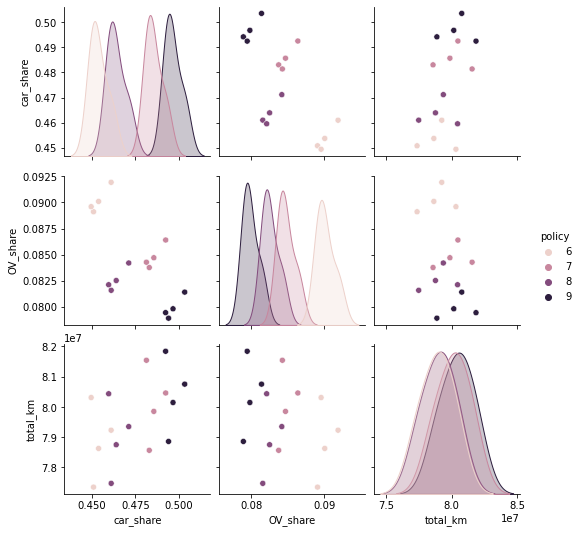

In [41]:
sns.pairplot(data, hue='policy', vars=list(outcomes.keys()))
plt.show()

C:\Users\nlilbm\Anaconda3\lib\site-packages\ema_workbench\analysis\prim.py:30: ImportWarning: altair based interactive inspection not available
  warnings.warn(("altair based interactive "
[MainProcess/INFO] no time dimension found in results


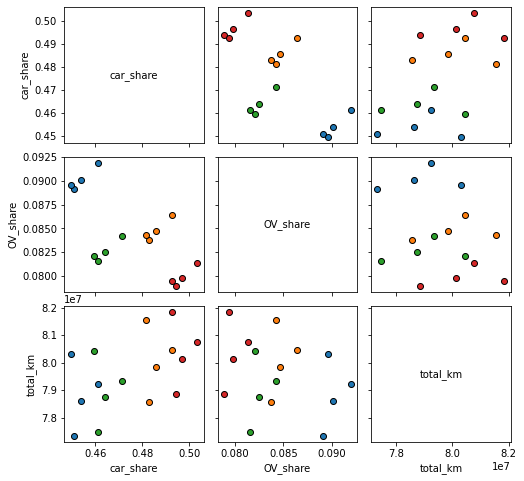

In [42]:
from ema_workbench.analysis import pairs_plotting

fig, axes = pairs_plotting.pairs_scatter(experiments, outcomes, group_by='policy',
                                         legend=False)
fig.set_size_inches(8,8)
plt.show()

In [43]:
from ema_workbench import save_results
save_results(results, '16 scenarios 4 policies.tar.gz')

from ema_workbench import load_results
results = load_results('16 scenarios 4 policies.tar.gz')

[MainProcess/INFO] results saved successfully to C:\Users\nlilbm\Documents\Thesis\16 scenarios 4 policies.tar.gz
[MainProcess/INFO] results loaded succesfully from C:\Users\nlilbm\Documents\Thesis\16 scenarios 4 policies.tar.gz


In [45]:
from ema_workbench.analysis import prim

x = experiments
y = outcomes['car_share'] < 0.49
prim_alg = prim.Prim(x, y, threshold=0.8)
box1 = prim_alg.find_box()

[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] 16 points remaining, containing 11 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.5625, coverage: 0.8181818181818182, density: 1.0 restricted_dimensions: 2


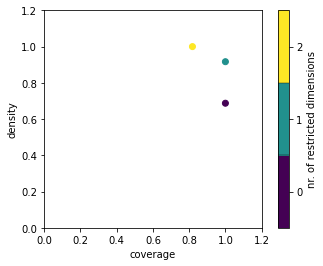

In [46]:
box1.show_tradeoff()
plt.show()

coverage    0.818182
density            1
id                 2
mass          0.5625
mean               1
res_dim            2
Name: 2, dtype: object

             box 2                                       
               min       max                    qp values
KMKOSTEN  0.579641  0.825432  [0.07508468627929688, -1.0]
EBIKE_BS  0.302802  0.438869  [0.45698605951046484, -1.0]



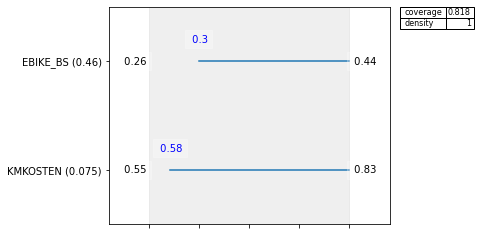

In [50]:
box1.inspect(2)
box1.inspect(2, style='graph')
plt.show()

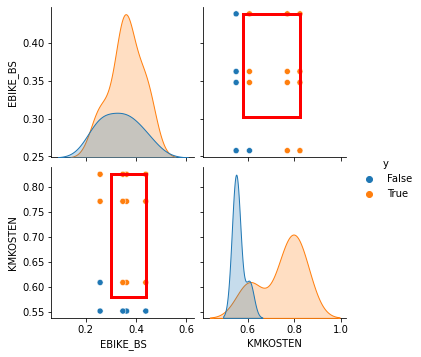

In [52]:
box1.show_pairs_scatter(2)
plt.show()

[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category


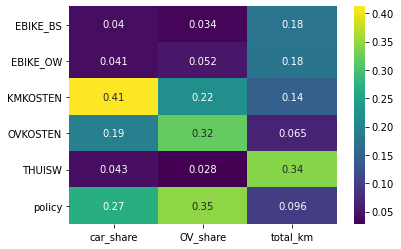

In [53]:
from ema_workbench.analysis import feature_scoring

x = experiments
y = outcomes

fs = feature_scoring.get_feature_scores_all(x, y)
sns.heatmap(fs, cmap='viridis', annot=True)
plt.show()

[MainProcess/INFO] model dropped from analysis because only a single category


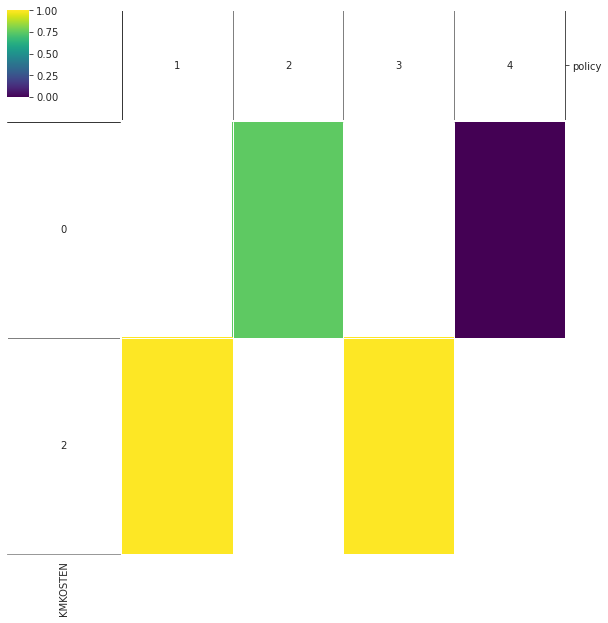

In [76]:
from ema_workbench.analysis import dimensional_stacking

x = experiments
y = outcomes['car_share'] < 0.49
dimensional_stacking.create_pivot_plot(x,y, 1, nbins=3)
plt.show()


In [66]:
from ema_workbench import (RealParameter, IntegerParameter, ScalarOutcome, Constant,
                           Model)

model = Model('bigmodel', function=big_model)

#specify uncertainties
model.uncertainties = [RealParameter('EBIKE_BS', 0.2, 0.5),
                      RealParameter('EBIKE_OW', 0.08, 0.25),
                      RealParameter('THUISW', 0.8, 0.99)]

# set levers
model.levers = [RealParameter('KMKOSTEN', 0.5 ,0.9),
               RealParameter('OVKOSTEN', 0.9, 1.1),
               RealParameter('EBIKE_BS', 0.2, 0.5),
                RealParameter('EBIKE_OW', 0.08, 0.25),
                RealParameter('THUISW', 0.8, 0.99)]

#specify outcomes
model.outcomes = [ScalarOutcome('car_share',ScalarOutcome.MINIMIZE),
                  ScalarOutcome('OV_share',ScalarOutcome.MAXIMIZE),
                  ScalarOutcome('total_km',ScalarOutcome.MAXIMIZE),]

model.constants = [Constant('nsamples', 1)]

In [67]:
from ema_workbench import MultiprocessingEvaluator, ema_logging

ema_logging.log_to_stderr(ema_logging.INFO)

with SequentialEvaluator(model) as evaluator:
    results = evaluator.optimize(nfe=250, searchover='levers',
                                 epsilons=[0.1,]*len(model.outcomes))

[MainProcess/INFO] generation 0: 0/250 nfe


KeyboardInterrupt: 